In [3]:
import pandas as pd

home_data = pd.read_csv('Mall_Customers.csv', usecols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
home_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

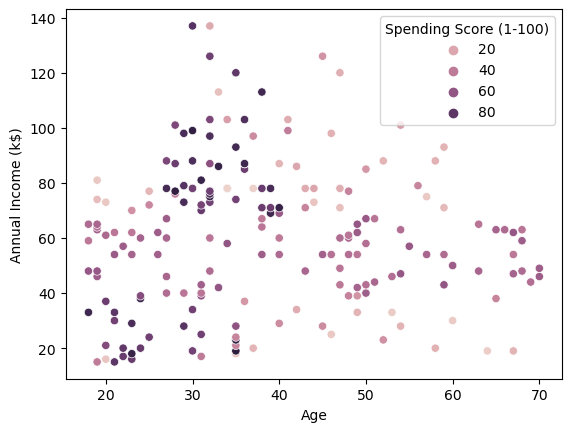

In [4]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'Age', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['Age', 'Annual Income (k$)']], home_data[['Spending Score (1-100)']], test_size=0.33, random_state=0)

In [6]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

c:\Users\yashm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

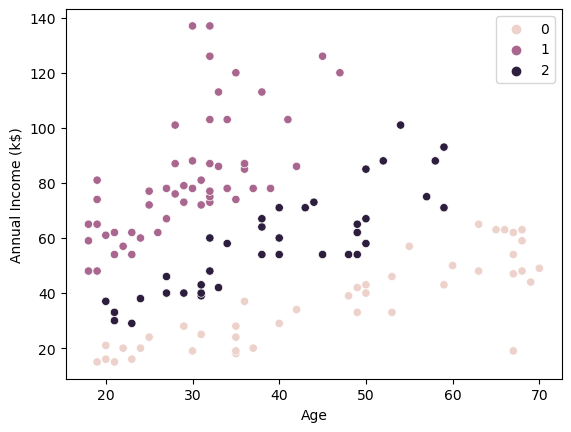

In [8]:
sns.scatterplot(data = X_train, x = 'Age', y = 'Annual Income (k$)', hue = kmeans.labels_)

<Axes: ylabel='Spending Score (1-100)'>

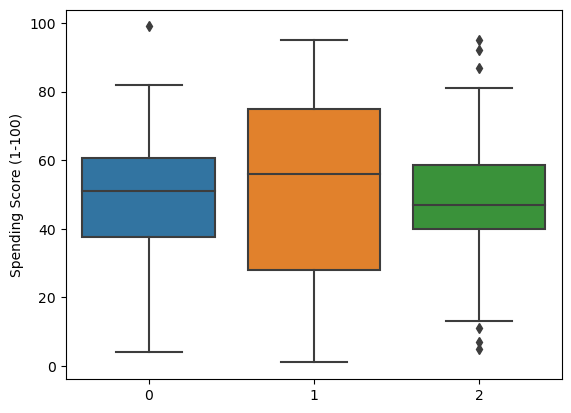

In [9]:
sns.boxplot(x = kmeans.labels_, y = y_train['Spending Score (1-100)'])

In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.6479480688309227

In [11]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

c:\Users\yashm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yashm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yashm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\yashm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

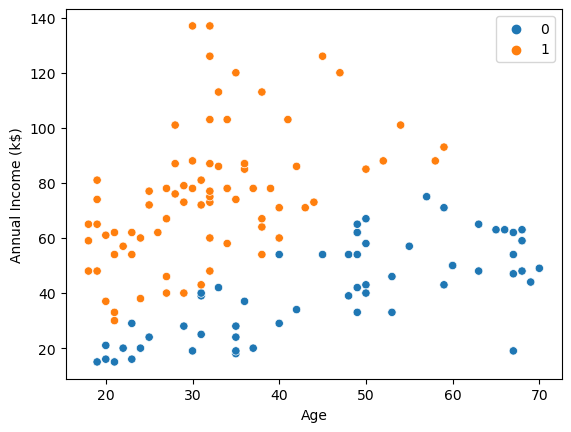

In [12]:
sns.scatterplot(data = X_train, x = 'Age', y = 'Annual Income (k$)', hue = fits[0].labels_)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

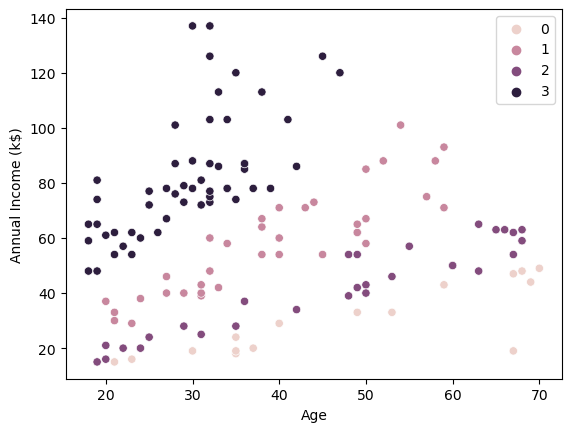

In [13]:
sns.scatterplot(data = X_train, x = 'Age', y = 'Annual Income (k$)', hue = fits[2].labels_)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

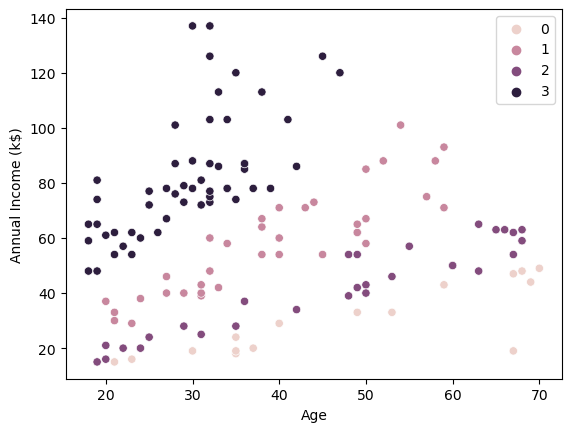

In [14]:
sns.scatterplot(data = X_train, x = 'Age', y = 'Annual Income (k$)', hue = fits[2].labels_)

<Axes: >

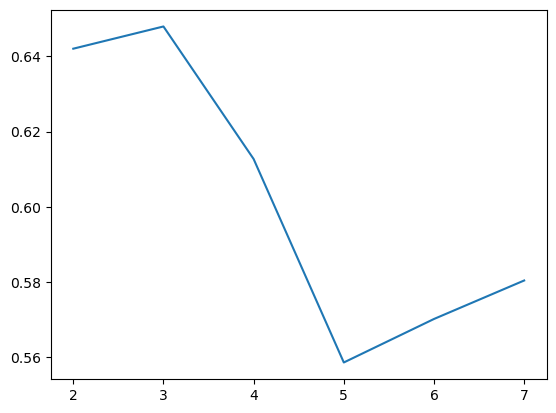

In [15]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

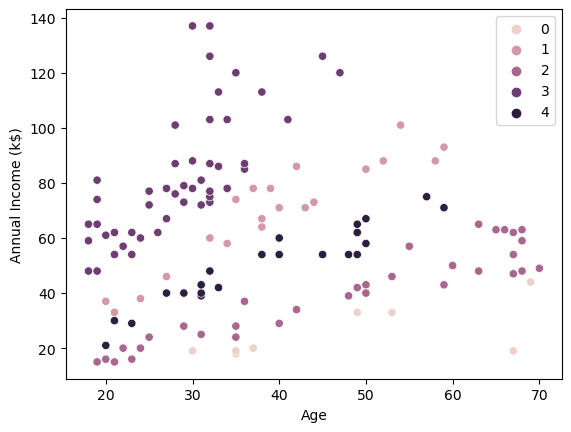

In [16]:
sns.scatterplot(data = X_train, x = 'Age', y = 'Annual Income (k$)', hue = fits[3].labels_)

<Axes: ylabel='Spending Score (1-100)'>

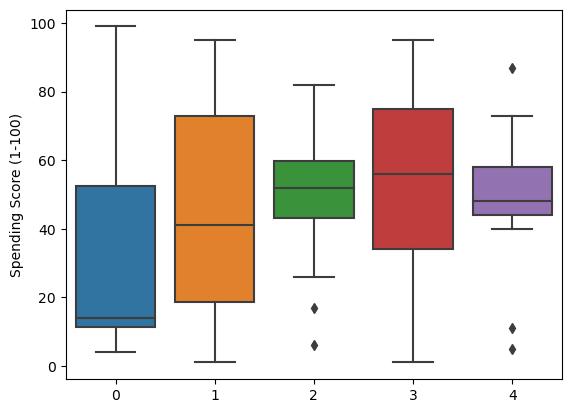

In [17]:
sns.boxplot(x = fits[3].labels_, y = y_train['Spending Score (1-100)'])